# Machine Learning

## Table of contents <a name=contents></a>

1. [Packages](#packages)
2. [Grasping data](#grasp)
3. [Data cleaning](#clean)
4. [Pandas profiling](#profile)
5. [Data visualisation](#visuals)
6. [Observations](#obs)
7. [Problems](#problems)

## 1. Import packages <a name=packages></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport

Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 2. Grasping data <a name=grasp></a>

In [2]:
df = pd.read_csv("data/BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [5]:
df.shape

(10127, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 3. Data Cleaning <a name=clean></a>

In [40]:
"""
integer columns with NaN values: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
"""
def cleaning(df):
    df = df.drop(columns=["CLIENTNUM"])
    
    df = df.applymap(lambda x: float("NaN") if x == "Unknown" else x)
    
    #Attrition_Flag: Attrited Customer = 1, Existing Customer = 0
    df["Attrition_Flag"] = df[["Attrition_Flag"]].applymap(lambda x: 1 if x =="Attrited Customer" else 0)
    
    # Gender: F = 1, M = 0
    df["Gender"] = df[["Gender"]].applymap(lambda x: 1 if x == "F" else 0)
    
    education = ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]
    df["Education_Level"] = df[["Education_Level"]].applymap(lambda x: education.index(x) if x in education else x)
    
    income = ["Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +"]
    df["Income_Category"] = df[["Income_Category"]].applymap(lambda x: income.index(x) if x in income else x)
    
    color = ["Blue", "Silver", "Gold", "Platinum"]
    df["Card_Category"] = df[["Card_Category"]].applymap(lambda x: color.index(x))
    
    return df

In [41]:
# Marital_Status -> how to manage?

In [43]:
clean_df = cleaning(df)
clean_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1.0,Married,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,3.0,Single,0.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,3.0,Married,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1.0,NaN,0.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0.0,Married,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,3.0,Single,1.0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,NaN,Divorced,1.0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,1.0,Married,0.0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,3.0,NaN,1.0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   float64
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [25]:
"""
7 to 15% of missing values in 3 columns.
First try with those columns.
Other options:
- drop those columns
- make synthetic data
"""
clean_df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [21]:
help(df.isna)

Help on method isna in module pandas.core.frame:

isna() -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Detect missing values.
    
    Return a boolean same-sized object indicating if the values are NA.
    NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
    values.
    Everything else gets mapped to False values. Characters such as empty
    strings ``''`` or :attr:`numpy.inf` are not considered NA values
    (unless you set ``pandas.options.mode.use_inf_as_na = True``).
    
    Returns
    -------
    DataFrame
        Mask of bool values for each element in DataFrame that
        indicates whether an element is an NA value.
    
    See Also
    --------
    DataFrame.isnull : Alias of isna.
    DataFrame.notna : Boolean inverse of isna.
    DataFrame.dropna : Omit axes labels with missing values.
    isna : Top-level isna.
    
    Examples
    --------
    Show which entries in a DataFrame are NA.
    
    >>> df = pd.DataFrame(dict(age=[5, 6

Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 4. Pandas profiling <a name=profile></a>

In [37]:
profile = ProfileReport(df,title="Pandas Profiling Report All")#df.iloc[:,-10:], title="Pandas Profiling Report")

# profile.to_widgets()

# profile.to_notebook_iframe()

profile

In [26]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 5. Data Visualisation <a name=visuals></a>

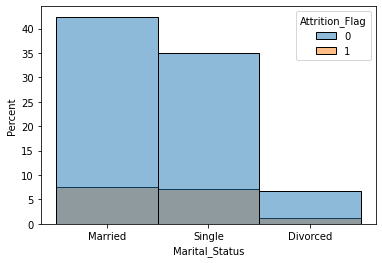

In [43]:
sns.histplot(data=df,x="Marital_Status", hue="Attrition_Flag", stat="percent")

In [27]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

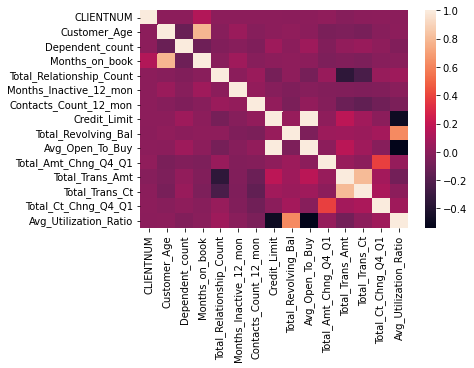

In [24]:
corr = df.corr()

sns.heatmap(corr)

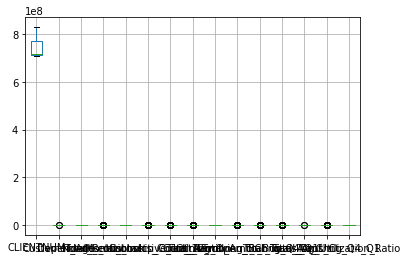

In [25]:
df.boxplot()

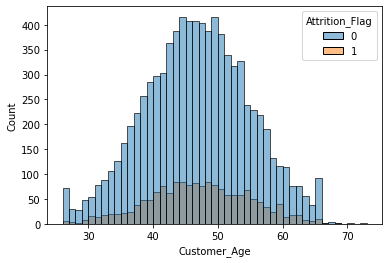

In [49]:
sns.histplot(data=df,x="Customer_Age", hue="Attrition_Flag")
# problem in the histogram of pandas_profiling?

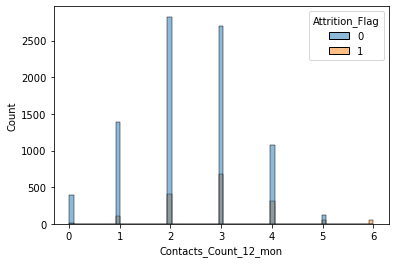

In [59]:
sns.histplot(data=df,x="Contacts_Count_12_mon", hue="Attrition_Flag")
# more calls with attrition

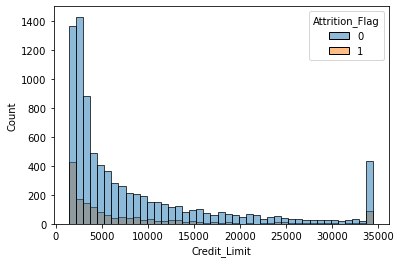

In [60]:
sns.histplot(data=df,x="Credit_Limit", hue="Attrition_Flag")
# more attrition for minimum credit-limit

Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 6. Observations <a name=obs></a>
- CLIENTNUM: client identification number
- Attrition_Flag **TARGET**: still client or gone one (attrited). Existing Customer/Attrited Customer
    - 16% gone
- Customer_Age: int
    - mean: 46
    - min: 26
    - max: 73
    - 50 % between 41 and 52
    - negligible after 65 (pension?)
- Gender: M/F
    - 47/53
- Dependent_count: dependants (personnes à charge), int
    - max: 5
    - mean: 2
    - 53%: 2 & 3
- Education_Level: Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown
    - mean: 2
    - mode 30%: Graduate
- Marital_Status: Married, Single, Unknown, Divorced
- Income_Category: Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +, Unknown
    - mean: 1
    - mode 35%: 0
    - 75%: 3
    - 11%: NaN
- Card_Category: Blue, Silver, Gold, Platinum
    - mode 93%: Blue
- Months_on_book: "time use"
    - min: 13
    - max: 56
    - mean & mode 24%: **36**
    - IQR: 9
- Total_Relationship_Count: Amount of products in the bank
    - max: 6
    - mean: 4
    - 21%: 1 & 2
- Months_Inactive_12_mon: inactive months in the last 12 months
    - max: 6
    - mean: 2
    - 92%: 1 to 3
    - mode 38%: 3
- Contacts_Count_12_mon
    - max: 6
    - mean: 2
    - 64%: 2 & 3
- Credit-Limit
    - min & mode 5%: 1438.3
    - max & mode 5%: 34 516
    - mean: 8632
    - median: 4549
    - std = IQR: 9000-8500
- Total_Revolving_bal: revolve a balance is not pay it off at the end of the month
    - max 5%: 2517
    - mean: 1163
    - std: 814
    - mode 24%: 0
    - otherwise negligible under 500 dollars
- Avg_Open_To_Buy: difference between the credit limit and the present balance (what the client can still spend)
    - mean: 7469
    - median: 3474
    - Q3: 9859
    - 5% between 32 138 and 34 516
- Total_Amt_Chng_Q4_Q1: Change in transaction amount from the first to the fourth quarter (relative)
    - max: 3.397
    - mean: 0.76
    - Q1-Q3: 0.63-0.86
- Total_Trans_Amt: over the year
    - min: 510
    - max: 18 484 (<< max credit limit)
    - mean: 4404
    - Q3: 4741
    - median: 3899
    - several peaks: around 1000, 4200, 8000, 15000 (CV = 0.77)
- Total_Trans_Ct: over the year
    - min: 10
    - max: 139
    - mean: 65
    - mode: 81
    - Q1-Q3: 45-81
    - 2 peaks: around 40 and 75   
- Total_Ct_Chng_Q4_Q1: change in transaction count from the 1st to the 4th quarter
    - max: 3.71
    - mean: 0.71
    - Q1-Q3: 0.582-0.818
- Avg_Utilization_Ratio: credit card debt (total revolving balance) divided by credit card limits
    - max: 0.999
    - mean: 0.27
    - median: 0.18 (difference not as total revolving balance)
    - std: 0.28
    - peaks: aside 0, around 0.07 and 0.6 

Back to the [table of contents](#contents).

Go to the [observations](#obs).
## 7. Problems <a name=problems></a>

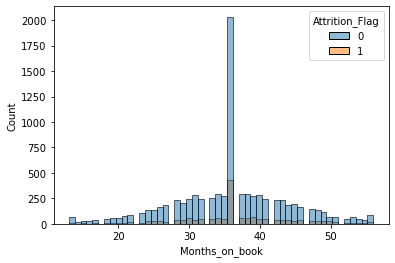

In [56]:
sns.histplot(data=df,x="Months_on_book", hue="Attrition_Flag")
# quid de ces trous dans l'histogramme?